#### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

#### Manipulando os datasets

Lendo o dataset

In [2]:
df = pd.read_excel(r'Dados\dataset_rolling_stones.xlsx')

##### Tratamento dos dados

Transformando a coluna de milisegundos(ms) em minutos(m)

In [3]:
df['duracao_em_minutos'] = df['duration_ms'] / 60000

In [4]:
df['is_live'] = df['liveness'].apply(lambda x: 'True' if x >= 0.8 else 'False')

##### Análise exploratória

In [5]:
display(df.head(3))

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos,is_live
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True


Informações básicas do df

In [6]:
display(df.info())
print('-'*50)
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                1610 non-null   object        
 1   album               1610 non-null   object        
 2   release_date        1610 non-null   datetime64[ns]
 3   track_number        1610 non-null   int64         
 4   acousticness        1610 non-null   float64       
 5   danceability        1610 non-null   float64       
 6   energy              1610 non-null   float64       
 7   instrumentalness    1610 non-null   float64       
 8   liveness            1610 non-null   float64       
 9   loudness            1610 non-null   float64       
 10  speechiness         1610 non-null   float64       
 11  tempo               1610 non-null   float64       
 12  valence             1610 non-null   float64       
 13  popularity          1610 non-null   int64       

None

--------------------------------------------------
(1610, 17)


Data inicial e final de lançamentos

In [7]:
print('Data Inicial:', df['release_date'].min())
print('Data Final:', df['release_date'].max())

Data Inicial: 1964-04-16 00:00:00
Data Final: 2022-06-10 00:00:00


Quantidade de nulos

In [8]:
df.isnull().sum()

name                  0
album                 0
release_date          0
track_number          0
acousticness          0
danceability          0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
popularity            0
duration_ms           0
duracao_em_minutos    0
is_live               0
dtype: int64

 Dados duplicados

In [9]:
display(df.duplicated().sum())
display(df[df.duplicated()].head(3))

# os dados repetidos sao de nome de albuns iguais, mas musicas diferentes

6

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos,is_live
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.5200,0.299,-2643.0,0.0898,71995.0,0.505,21,276933,4.615550,False
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.9500,0.617,-1568.0,0.1880,162428.0,0.563,16,191266,3.187767,False
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.0221,0.383,-4386.0,0.1280,105124.0,0.364,17,222253,3.704217,False


Analise estatística

In [10]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


Visualizando albuns com maior duracao de tempo das musicas

In [11]:
# criando uma tabela com os top 15 albuns com maior duracao media
df_duracao_media_algum = df.groupby('album')['duracao_em_minutos'].mean().sort_values(ascending=False).reset_index().head(15)
display(df_duracao_media_algum.head(3))
print(df_duracao_media_algum.shape)

,album,duracao_em_minutos
0,Havana Moon (Live),6.632819
1,Bridges To Bremen (Live),6.332265
2,Jamming With Edward,6.042794


(15, 2)


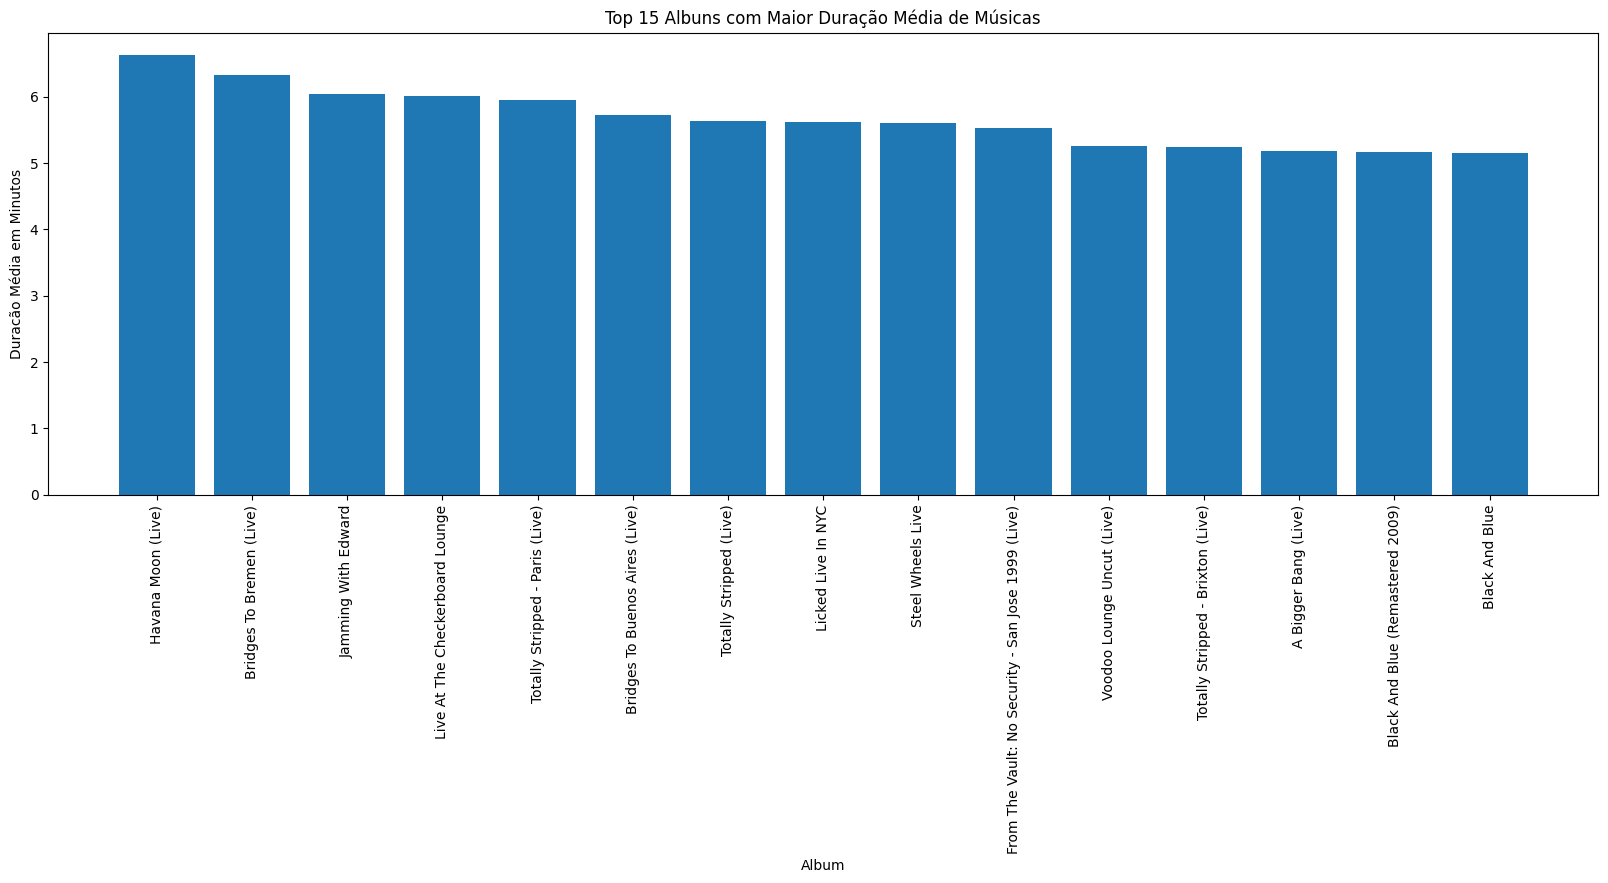

In [12]:
# plotando a tabela anterior em grafico
plt.figure(figsize=(20, 6))

plt.bar(df_duracao_media_algum['album'], df_duracao_media_algum['duracao_em_minutos'])
plt.ylabel('Duracão Média em Minutos')
plt.xlabel('Album')
plt.xticks(rotation=90)
plt.title('Top 15 Albuns com Maior Duração Média de Músicas')
plt.show()

Visualizando albuns com maiores numeros de musicas

In [13]:
# criando uma tabela com os top 10 albuns com maior numero de musicas
df_top_albuns_numero_musicas = df.groupby('album')['name'].count().sort_values(ascending=True).reset_index().head(10)
df_top_albuns_numero_musicas.columns = ['album', 'numero_musicas']
display(df_top_albuns_numero_musicas.head(3))
print(df_top_albuns_numero_musicas.shape)

,album,numero_musicas
0,Jamming With Edward,6
1,Black And Blue,8
2,Black And Blue (Remastered 2009),8


(10, 2)


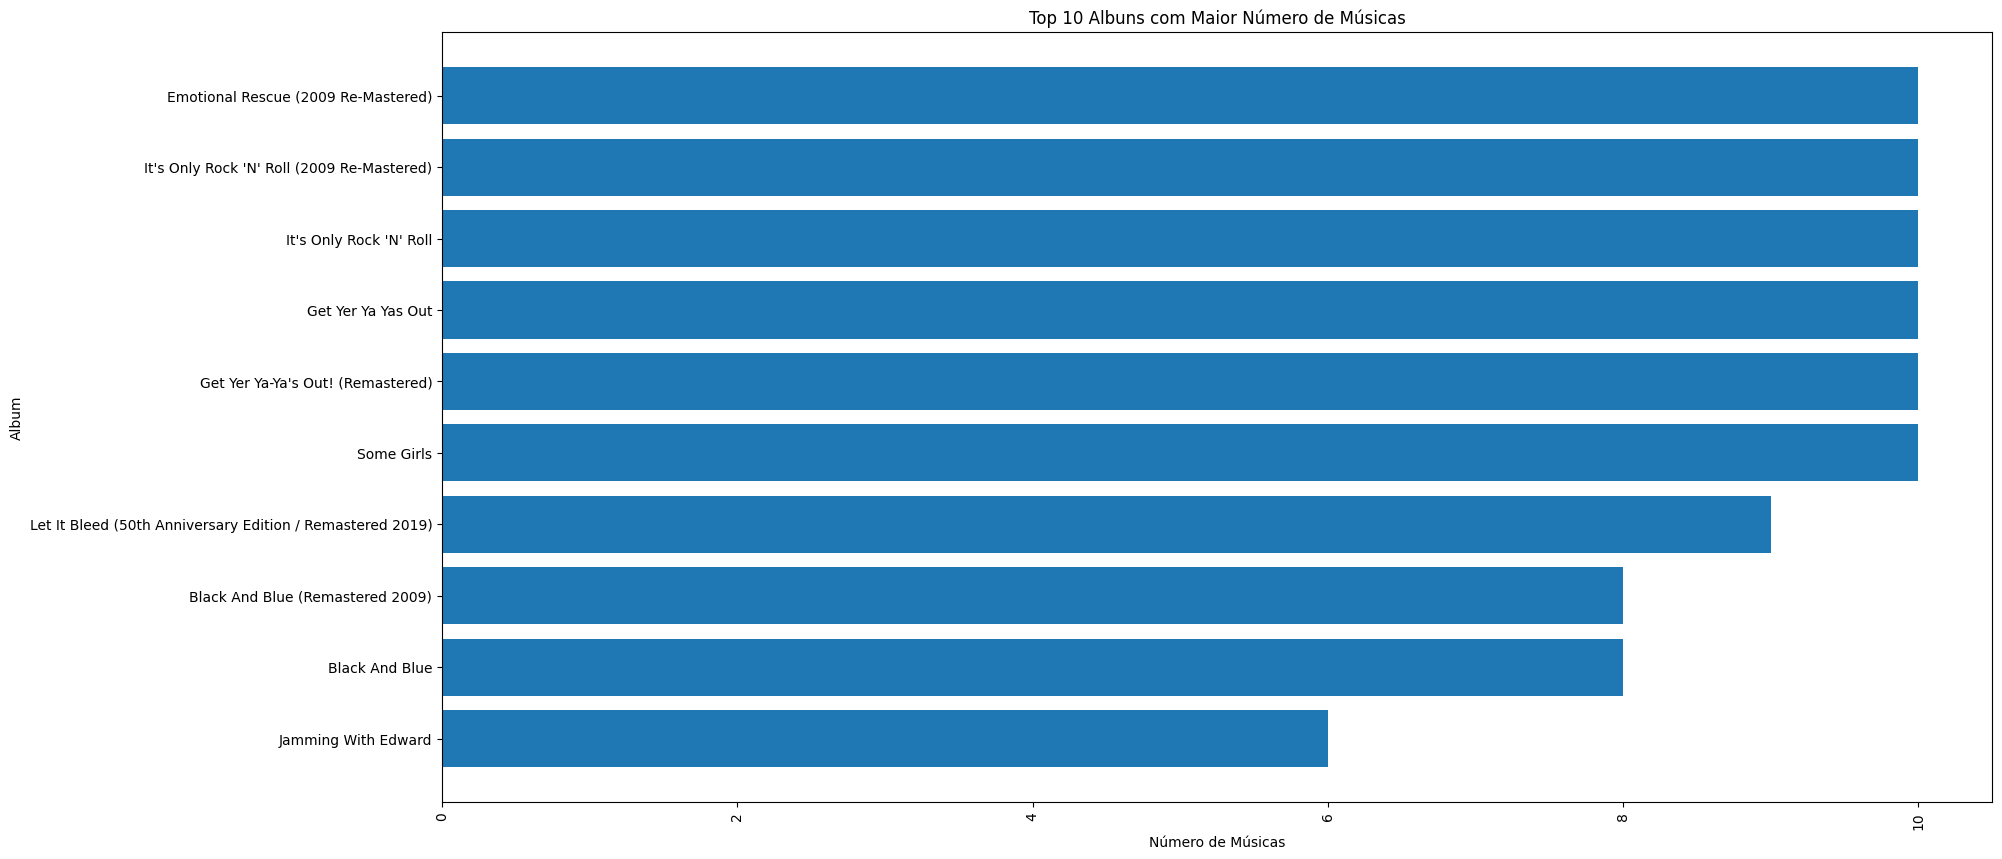

In [14]:
# plotando a tabela anterior em grafico
plt.figure(figsize=(20, 10))

plt.barh(df_top_albuns_numero_musicas['album'], df_top_albuns_numero_musicas['numero_musicas'])
plt.ylabel('Album')
plt.xlabel('Número de Músicas')
plt.xticks(rotation=90)
plt.title('Top 10 Albuns com Maior Número de Músicas')
plt.show()

Analisando a popularidade na última década

In [15]:
# filtrando os dados para pegar apenas os albuns da ultima decada
df_ultima_decada = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

'''
O método between no Pandas é utilizado para filtrar os dados de um DataFrame ou Series com base em um intervalo especificado. Ele é útil quando você deseja selecionar valores que estão entre dois limites (inclusive ou exclusivo).
Parâmetros
- left: Limite inferior do intervalo.
- right: Limite superior do intervalo.
- inclusive: Indica se os limites devem ser incluídos no intervalo. Pode ser:
-- 'both': Inclui ambos os limites (padrão).
-- 'neither': Exclui ambos os limites.
-- 'left': Inclui apenas o limite inferior.
-- 'right': Inclui apenas o limite superior.
'''

display(df_ultima_decada.head(3))
print(df_ultima_decada.shape)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos,is_live
189,(I Can't Get No) Satisfaction - Live,Bridges To Buenos Aires (Live),2019-11-08,1,0.0215,0.294,0.986,0.05030,0.588,-5094.0,0.206,142591.00,0.0918,24,320440,5.340667,False
190,Let's Spend The Night Together - Live,Bridges To Buenos Aires (Live),2019-11-08,2,0.1080,0.487,0.983,0.00003,0.944,-4454.0,0.251,143.53,0.2870,24,245493,4.091550,True
191,Flip The Switch - Live,Bridges To Buenos Aires (Live),2019-11-08,3,0.0827,0.335,0.972,0.00372,0.931,-4931.0,0.208,152321.00,0.3370,19,243906,4.065100,True


(419, 17)


In [16]:
# agrupando os dados da ultima decada por album e popularidade
df_pop_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).reset_index().head(10)
df_pop_album['Part %'] = (df_pop_album['popularity'] / df_pop_album['popularity'].sum()) * 100

display(df_pop_album)

,album,popularity,Part %
0,Honk (Deluxe),1232,23.153543
1,Voodoo Lounge Uncut (Live),654,12.290923
2,On Air (Deluxe),573,10.768653
3,Live At The Checkerboard Lounge,482,9.058448
4,Havana Moon (Live),445,8.363090
5,Bridges To Buenos Aires (Live),433,8.137568
6,Blue & Lonesome,419,7.874460
7,Bridges To Bremen (Live),396,7.442210
8,Some Girls: Live In Texas '78,344,6.464950
9,Ladies & Gentlemen (Live),343,6.446157


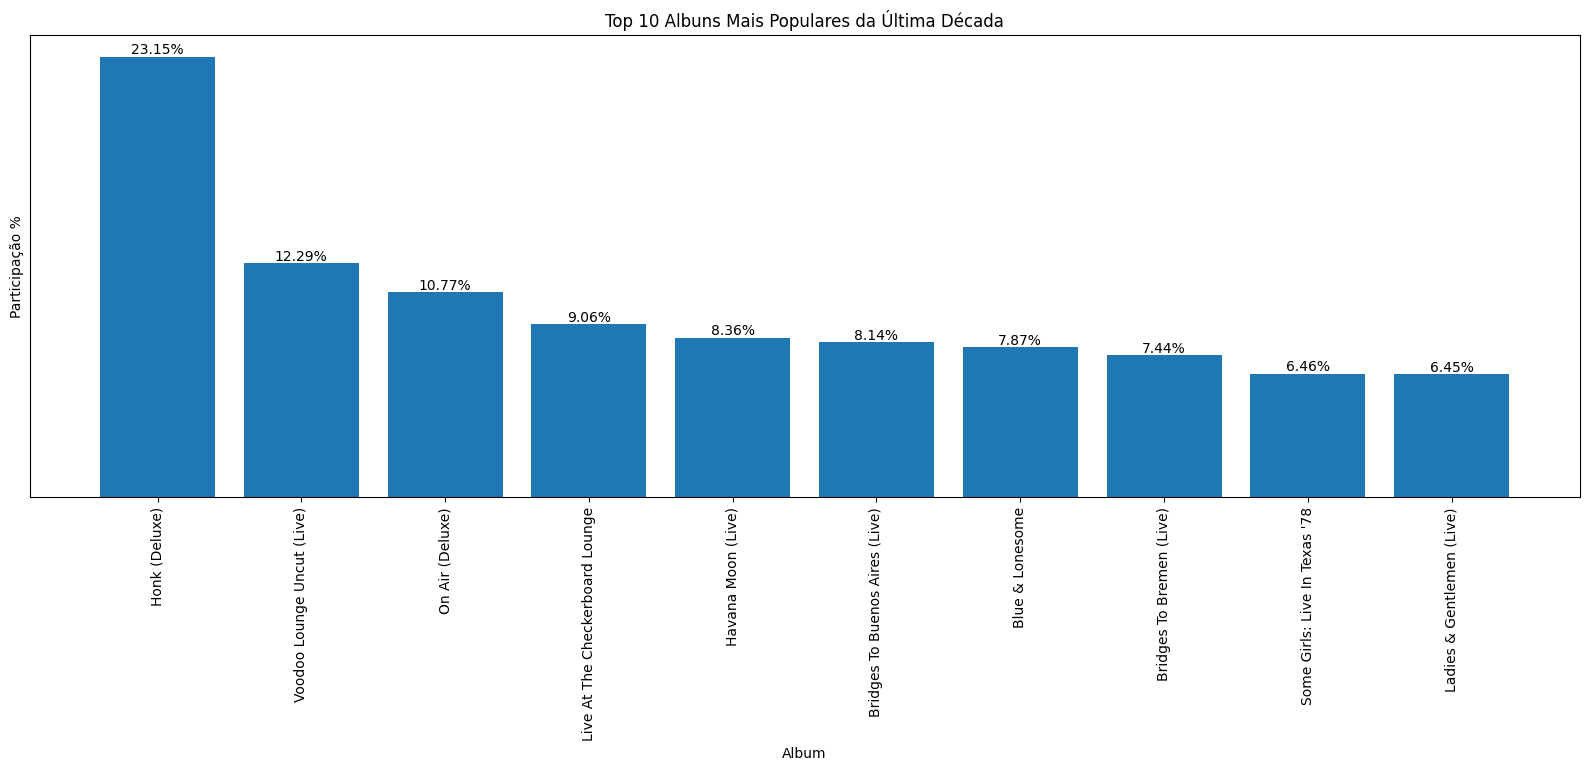

In [17]:
# criando um grafico com os albuns mais populares da ultima decada
plt.figure(figsize=(20, 6))

plt.bar(df_pop_album['album'], df_pop_album['Part %'])
plt.ylabel('Participação %')
plt.xlabel('Album')
plt.xticks(rotation=90)
plt.yticks([])

# Adicionar rótulos de dados em %
for i, value in enumerate(df_pop_album['Part %']):
    plt.text(i, value, f"{value:.2f}%", ha='center', va='bottom')

plt.title('Top 10 Albuns Mais Populares da Última Década')
plt.show()

Identificando outliers

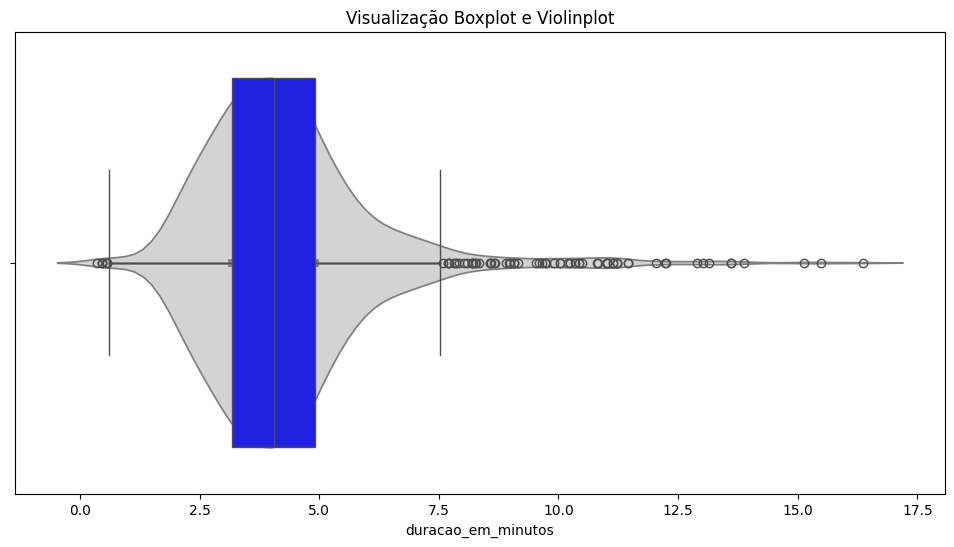

In [18]:
fig, axes = plt.subplots(figsize=(12, 6))

sns.violinplot(x='duracao_em_minutos', data=df, ax=axes, color='lightgray')
sns.boxplot(x='duracao_em_minutos', data=df, ax=axes, color='blue', whis=1.5)

axes.set_title('Visualização Boxplot e Violinplot')
plt.show()

In [19]:
# quantidade de músicas segmento se é ao vivo ou não
display(df.groupby('is_live')['name'].count())

is_live
False    1112
True      498
Name: name, dtype: int64

In [20]:
# criando df com informacoes de musicas gravadas em estudio e ao vivo
df_gravado_em_studio = df[df['is_live'] == 'False']
df_show_ao_vivo = df[df['is_live'] == 'True']

In [21]:
print(f'Média de duracao de musicas gravadas em estudio: {df_gravado_em_studio['duracao_em_minutos'].mean():.2f}')
print(f'Média de duracao de musicas ao vivo: {df_show_ao_vivo['duracao_em_minutos'].mean():.2f}')

Média de duracao de musicas gravadas em estudio: 3.94
Média de duracao de musicas ao vivo: 5.09


Criando dois gráficos para comparar o barulho feito por musicas ao vivo e em studio

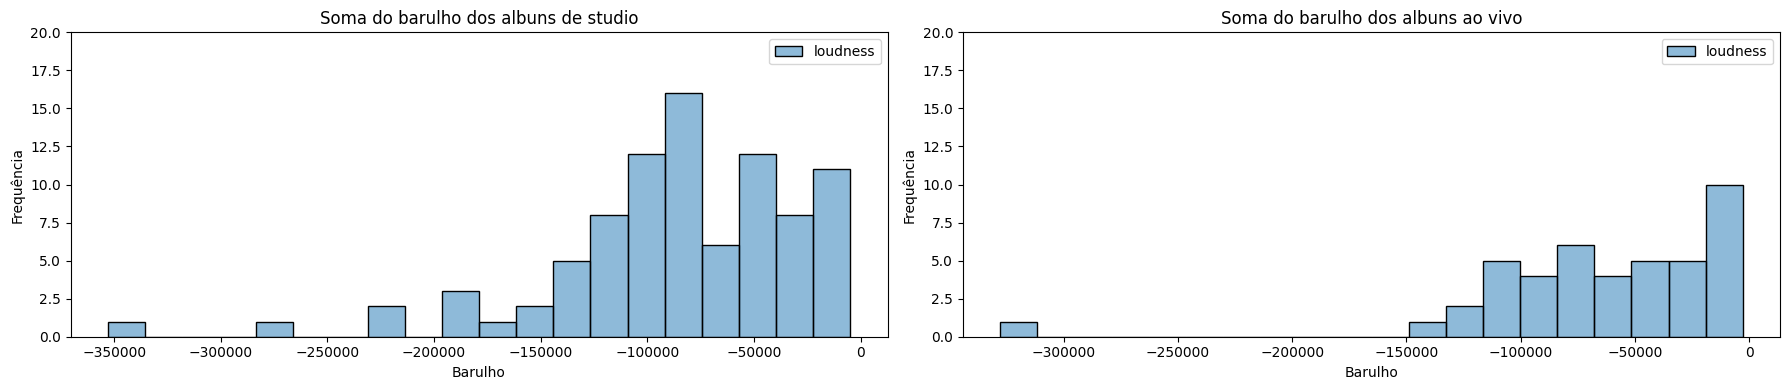

In [22]:
# criando dfs separados
df_studio = df_gravado_em_studio.groupby('album')['loudness'].sum().sort_values(ascending=False).reset_index()
df_ao_vivo = df_show_ao_vivo.groupby('album')['loudness'].sum().sort_values(ascending=False).reset_index()

# criando uma figura
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# plotando o primeiro grafico
sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title('Soma do barulho dos albuns de studio')
axes[0].set_xlabel('Barulho')
axes[0].set_ylabel('Frequência')
axes[0].set_ylim(0, 20)


#plotando o segundo gráfico
sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title('Soma do barulho dos albuns ao vivo')
axes[1].set_xlabel('Barulho')
axes[1].set_ylabel('Frequência')
axes[1].set_ylim(0, 20)

fig.tight_layout()
plt.show()

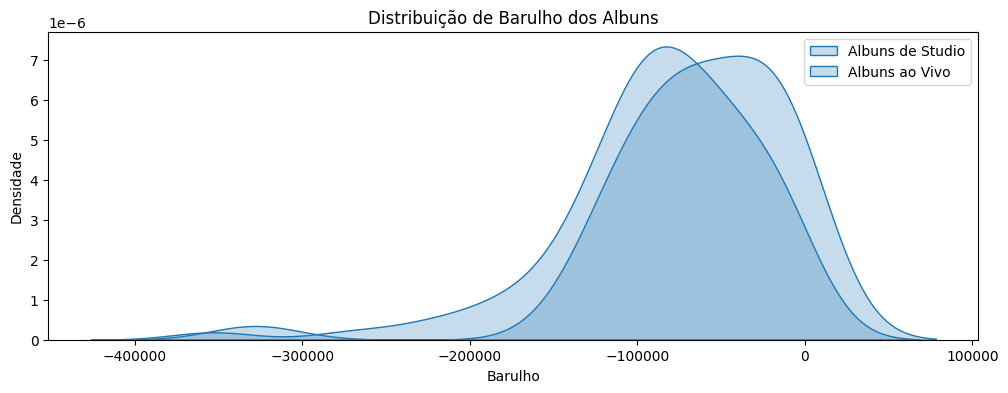

In [23]:
fig, axes = plt.subplots(figsize=(12, 4))

sns.kdeplot(data=df_studio, label='Albuns de Studio', fill=True)
sns.kdeplot(data=df_ao_vivo, label='Albuns ao Vivo', fill=True)

plt.title('Distribuição de Barulho dos Albuns')
plt.xlabel('Barulho')
plt.ylabel('Densidade')
plt.legend()
plt.show()


In [24]:
# avaliando se a distribuição do df studio é normal
stat, p = shapiro(df_studio['loudness'])
print('Soma do barulho dos albuns de studio: ')
print(f'Estatística de teste: {stat:.4f}, valor p: {p}')

if p > 0.05:
    print('Não há evidências para rejeitar a hipótese de normalidade')
else:
    print('A hipótese de normalidade é rejeitada')

Soma do barulho dos albuns de studio: 
Estatística de teste: 0.8958, valor p: 3.2961810837730903e-06
A hipótese de normalidade é rejeitada


In [25]:
# avaliando se a distribuição do df ao vivo é normal
stat, p = shapiro(df_ao_vivo['loudness'])
print('Soma do barulho dos albuns ao vivo: ')
print(f'Estatística de teste: {stat:.4f}, valor p: {p}')

if p > 0.05:
    print('Não há evidências para rejeitar a hipótese de normalidade')
else:
    print('A hipótese de normalidade é rejeitada')

Soma do barulho dos albuns ao vivo: 
Estatística de teste: 0.7913, valor p: 2.3506009149708905e-06
A hipótese de normalidade é rejeitada


In [26]:
# avaliando se hã diferença estatistica nas distribuições de barulho entre os albuns de estudio e ao vivo
stat, p = mannwhitneyu(df_studio['loudness'].sample(len(df_studio)), df_ao_vivo['loudness'].sample(len(df_ao_vivo)), alternative='less')

print('Estatistica de teste U: ', stat)
print('Valor p: ', p)

alpha = 0.05
if p < alpha:
    print('Diferença estatisticamente significativa')
else:
    print('Não há diferença estatisticamente significativa')

Estatistica de teste U:  1367.0
Valor p:  0.0050727361177996585
Diferença estatisticamente significativa


Correlação

In [27]:
media_valence_por_album = df.groupby('album')['valence'].mean().sort_values(ascending=False).reset_index()
media_valence_por_album.columns = ['album', 'mean_valence']
media_valence_por_album['sentimento'] = np.where(media_valence_por_album['mean_valence'] >= 0.6, 'Positivo', 'Negativo')
display(media_valence_por_album.groupby('sentimento')['sentimento'].count())
display(media_valence_por_album.head(3))

sentimento
Negativo    38
Positivo    52
Name: sentimento, dtype: int64

,album,mean_valence,sentimento
0,It's Only Rock 'N' Roll,0.795200,Positivo
1,England's Newest Hit Makers,0.786833,Positivo
2,England’s Newest Hitmakers,0.786250,Positivo


In [28]:
# Criando um df final e nesse df estou incluindo a informação de 'mean_valence_album'  e 'sentimento'
df_final = pd.merge(df, media_valence_por_album, on='album', how='left')
display(df_final.head(2))

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos,is_live,mean_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,Negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,Negativo


In [29]:
# verificando a correlação entre as features
numeric_df = df_final.select_dtypes(include=np.number)
matriz_correlacao = numeric_df.corr()
correlacao_sentimento = matriz_correlacao['mean_valence'].sort_values(ascending=False)
display(correlacao_sentimento.head(3))

mean_valence    1.000000
valence         0.603258
danceability    0.492945
Name: mean_valence, dtype: float64

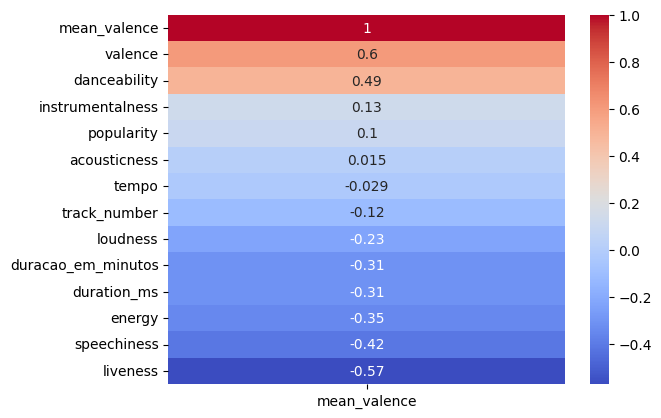

In [30]:
# plotando em gráfico
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap='coolwarm')
plt.show()

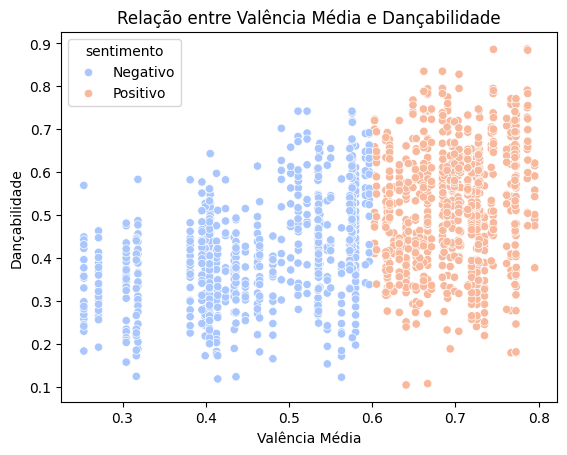

In [31]:
sns.scatterplot(x='mean_valence', y='danceability', hue='sentimento', data=df_final, palette='coolwarm')
plt.xlabel('Valência Média')
plt.ylabel('Dançabilidade')
plt.title('Relação entre Valência Média e Dançabilidade')
plt.show()

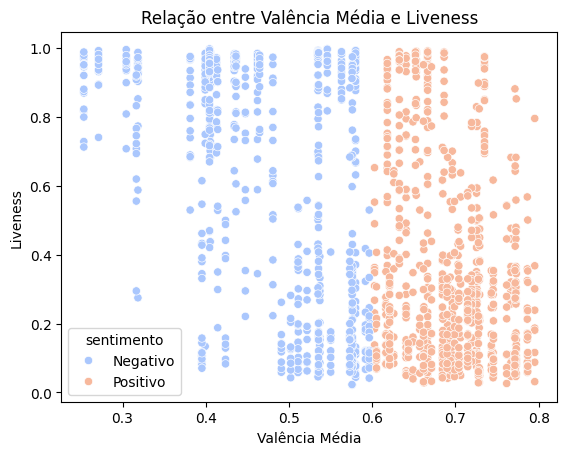

In [32]:
sns.scatterplot(x='mean_valence', y='liveness', hue='sentimento', data=df_final, palette='coolwarm')
plt.xlabel('Valência Média')
plt.ylabel('Liveness')
plt.title('Relação entre Valência Média e Liveness')
plt.show()